### Carga de datos, etc

In [36]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import PIL.Image as Image

from skimage import io, color, transform
from skimage.feature import hog

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [37]:
gray_matrix = np.load('DatosDF\gray_matrix.npy', allow_pickle=True)
pca = np.load('DatosDF\pca.npy', allow_pickle=True)
estados = np.load('DatosDF\estados.npy', allow_pickle=True)
label = np.load('DatosDF\labels.npy', allow_pickle=True)

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gonza\AppData\Local\Temp\ipykernel_27260\3099182347.py:1: SyntaxWarning: invalid escape sequence '\g'
  gray_matrix = np.load('DatosDF\gray_matrix.npy', allow_pickle=True)
C:\Users\gonza\AppData\Local\Temp\ipykernel_27260\3099182347.py:2: SyntaxWarning: invalid escape sequence '\p'
  pca = np.load('DatosDF\pca.npy', allow_pickle=True)
C:\Users\gonza\AppData\Local\Temp\ipykernel_27260\3099182347.py:3: SyntaxWarning: invalid escape sequence '\e'
  estados = np.load('DatosDF\estados.npy', allow_pickle=True)
C:\Users\gonza\AppData\Local\Temp\ipykernel_27260\3099182347.py:4: SyntaxWarning:

In [38]:
df = pd.DataFrame({'gray_matrix': gray_matrix,'pca': pca,'estados': estados,'label': label})

In [39]:
dfxusar = df[df['estados'] == 1]
elresto = df[df['estados'] == 0]
dfxusar

,gray_matrix,pca,estados,label
16,"[[175, 166, 185, 198, 202, 213, 212, 209, 210,...","[1.0912320462992262, 0.3657536288748723, 0.283...",1,angry
23,"[[26, 29, 30, 35, 45, 60, 108, 145, 161, 161, ...","[-0.7706739587282956, 0.721693515528713, 1.215...",1,angry
30,"[[17, 18, 19, 19, 17, 15, 16, 17, 18, 20, 18, ...","[0.7941313890964633, -0.6699144967452324, 0.43...",1,angry
31,"[[0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 13, 37, ...","[1.5112234099411108, 1.0339331627332178, -0.16...",1,angry
45,"[[254, 254, 254, 254, 254, 254, 254, 254, 254,...","[1.0902360530996267, 0.01650497232340127, -0.2...",1,angry
...,...,...,...,...
35863,"[[9, 38, 69, 99, 86, 102, 111, 105, 65, 58, 64...","[-0.5491822800503183, 0.37287554580139537, 0.5...",1,surprise
35869,"[[253, 253, 254, 253, 170, 101, 105, 102, 85, ...","[-0.831189505684772, -0.9824639195355812, -0.5...",1,surprise
35875,"[[252, 247, 146, 93, 94, 89, 99, 94, 93, 83, 9...","[-1.6612481070642713, -0.7122384048718365, 0.9...",1,surprise
35878,"[[33, 44, 49, 40, 35, 28, 23, 14, 9, 16, 17, 5...","[0.4970099444085885, -0.026777335969787118, 0....",1,surprise


In [40]:
X = np.array(dfxusar['pca'].values.tolist())
y = dfxusar['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19011)

## KNN

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred_e= knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_e)
print(f'Precisión del modelo Entrenamiento: {round(accuracy,5)}')

print(classification_report(y_train, y_pred_e))

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Prueba: {round(accuracy,5)}')

print(classification_report(y_test, y_pred))

Precisión del modelo Entrenamiento: 0.91079
              precision    recall  f1-score   support

       angry       0.89      0.94      0.91       462
     disgust       0.86      0.77      0.81       435
        fear       0.91      0.89      0.90       579
       happy       0.92      1.00      0.96       650
     neutral       0.89      0.97      0.93       622
         sad       0.97      0.78      0.86       467
    surprise       0.95      0.98      0.96       473

    accuracy                           0.91      3688
   macro avg       0.91      0.90      0.90      3688
weighted avg       0.91      0.91      0.91      3688

Precisión del modelo Prueba: 0.8169
              precision    recall  f1-score   support

       angry       0.75      0.79      0.77       101
     disgust       0.71      0.49      0.58       112
        fear       0.80      0.81      0.81       156
       happy       0.81      1.00      0.89       149
     neutral       0.83      0.95      0.89       15

## GridSearch - Optimizacion de parametros

### Primero

In [43]:
%%time
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33],
    'p':[2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10,n_jobs=8, return_train_score = True)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

##Entreno=====================
y_pred_e = best_rf_classifier.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_e)
print(f'Precisión del modelo Entrenamiento: {round(accuracy,5)}')
print(classification_report(y_train, y_pred_e))

##Testeo=======================
y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 17 candidates, totalling 85 fits
Mejores hiperparámetros: {'n_neighbors': 1, 'p': 2}
Precisión del modelo Entrenamiento: 1.0
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       462
     disgust       1.00      1.00      1.00       435
        fear       1.00      1.00      1.00       579
       happy       1.00      1.00      1.00       650
     neutral       1.00      1.00      1.00       622
         sad       1.00      1.00      1.00       467
    surprise       1.00      1.00      1.00       473

    accuracy                           1.00      3688
   macro avg       1.00      1.00      1.00      3688
weighted avg       1.00      1.00      1.00      3688

Precisión del modelo: 0.8613217768147345
              precision    recall  f1-score   support

       angry       0.88      0.85      0.86       101
     disgust       0.83      0.62      0.71       112
        fear       0.81      0.87      0.84   

**Resultados** 

Precisión del modelo: 0.828212351029252438
- 'n_neighbors': 3, 
- 'p': 2

In [44]:
results = grid_search.cv_results_
acc_e =[]
acc_t=[]
n_nnn=[]
i=1
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    acc_e.append(mean_train_score)
    acc_t.append(mean_test_score)
    n_nnn.append(i)
    print(f"Mean train score: {mean_train_score:.3f}, Mean test score: {mean_test_score:.3f} with parameters: {params}")
    i=i+2

Mean train score: 1.000, Mean test score: 0.870 with parameters: {'n_neighbors': 1, 'p': 2}
Mean train score: 0.931, Mean test score: 0.846 with parameters: {'n_neighbors': 3, 'p': 2}
Mean train score: 0.896, Mean test score: 0.824 with parameters: {'n_neighbors': 5, 'p': 2}
Mean train score: 0.871, Mean test score: 0.809 with parameters: {'n_neighbors': 7, 'p': 2}
Mean train score: 0.852, Mean test score: 0.789 with parameters: {'n_neighbors': 9, 'p': 2}
Mean train score: 0.835, Mean test score: 0.781 with parameters: {'n_neighbors': 11, 'p': 2}
Mean train score: 0.816, Mean test score: 0.763 with parameters: {'n_neighbors': 13, 'p': 2}
Mean train score: 0.796, Mean test score: 0.751 with parameters: {'n_neighbors': 15, 'p': 2}
Mean train score: 0.782, Mean test score: 0.743 with parameters: {'n_neighbors': 17, 'p': 2}
Mean train score: 0.769, Mean test score: 0.729 with parameters: {'n_neighbors': 19, 'p': 2}
Mean train score: 0.755, Mean test score: 0.722 with parameters: {'n_neighb

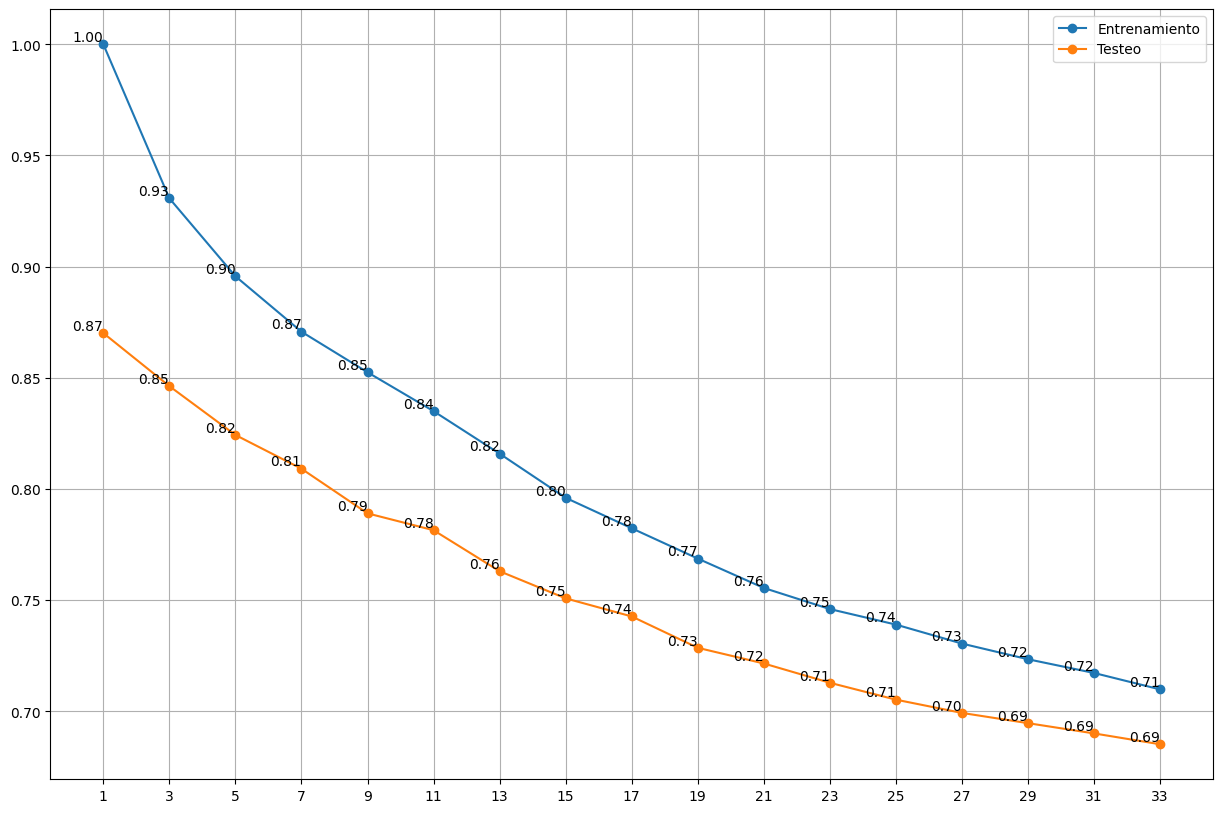

In [45]:
plt.figure(figsize=(15, 10))

plt.plot(acc_e, label='Entrenamiento', marker='o')
plt.plot(acc_t, label='Testeo', marker='o')

plt.xticks(range(len(n_nnn)), n_nnn)  # Set custom x-axis ticks and labels

for i, (x, ye, yt) in enumerate(zip(range(len(n_nnn)), acc_e, acc_t)):
    plt.text(x, ye, f'{ye:.2f}', ha='right', va='bottom')  # Training accuracy tag
    plt.text(x, yt, f'{yt:.2f}', ha='right', va='bottom')  # Testing accuracy tag

plt.legend()
plt.grid()
plt.show()